# 'This is Ecommerce data from an online store, The goods are shipped  to the clients preffered  destination'customers are categorized into three categories based on their preferred order.

# in the cell below we import the first dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df=pd.read_excel('ECOMM.xlsx')
pd.set_option('display.max_columns', 24)
df.head()

C:\Users\admin\Documents\Flatiron\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,26341,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,933.57,762.1845,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,923.63,-288.7650,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,915.49,919.9710,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,910.16,-96.5400,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,903.04,311.5200,Critical


# OVERVIEW OF THE DATA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ROW ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

# The data has 24 columns and 51290 rows composed of different data types

# CHECKING FOR MISSING VALUES IN THE FIRST DATASET

In [3]:
missing_values=df.isnull().sum()
missing_values

ROW ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Shipping Cost         0
Profit                0
Order Priority        0
dtype: int64

# FILLING ALL MISSING VALUES IN THE POSTAL CODE WITH 'RETURN TO SENDER' JUST INCASE THE GOODS ARE  UNDELIVERED

In [4]:
df['Postal Code']=df['Postal Code'].fillna('rts')
df.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,26341,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,933.57,762.1845,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,rts,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,923.63,-288.7650,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,rts,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,915.49,919.9710,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,rts,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,910.16,-96.5400,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,rts,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,903.04,311.5200,Critical


# Importing a second dataset on all the returned Orders

In [5]:
df1=pd.read_excel('returns.xlsx')
df1.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1173 non-null   object
 1   Order ID  1173 non-null   object
 2   Market    1173 non-null   object
dtypes: object(3)
memory usage: 27.6+ KB


# Merge the two datasets i.e df and data on Order ID

In [7]:
data = pd.merge(df, df1, on='Order ID', how='inner')
pd.set_option('display.max_columns', 26)
data.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market_x,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority,Returned,Market_y
0,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,rts,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,923.63,-288.765,Critical,Yes,APAC
1,26339,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,rts,APAC,Oceania,TEC-CO-10000660,Technology,Copiers,"Brother Fax and Copier, Laser",344.682,2,0.1,65.35,34.422,Critical,Yes,APAC
2,26340,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,rts,APAC,Oceania,OFF-ST-10001366,Office Supplies,Storage,"Rogers Folders, Wire Frame",133.920,5,0.1,41.64,-6.030,Critical,Yes,APAC
3,26342,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,rts,APAC,Oceania,TEC-AC-10004012,Technology,Accessories,"Enermax Flash Drive, Erganomic",70.794,2,0.1,10.48,25.134,Critical,Yes,APAC
4,12069,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,Italy,rts,EU,South,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",7958.580,14,0.0,778.32,3979.080,Low,Yes,EU


# Check for missing data in the merged data

In [8]:
missing=data.isnull().sum()
missing

ROW ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market_x          0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Shipping Cost     0
Profit            0
Order Priority    0
Returned          0
Market_y          0
dtype: int64

In [11]:
#Determine the number of days it takes to ship the orders
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Days_to_Ship'] = (data['Ship Date'] - data['Order Date']).dt.days

# using the describe function to get the statistical summary on the datasubset

In [12]:

dataset=data[['Sales','Quantity','Discount','Shipping Cost','Profit','Days_to_Ship']]
dataset.describe()

,Sales,Quantity,Discount,Shipping Cost,Profit,Days_to_Ship
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,268.336622,3.857283,0.112710,29.164155,38.624820,3.913584
std,523.339484,2.290164,0.176957,58.382301,212.899687,1.761777
min,1.680000,1.000000,0.000000,0.010000,-3701.892800,0.000000
25%,34.990000,2.000000,0.000000,2.965000,1.420000,3.000000
50%,97.824000,3.000000,0.000000,9.050000,12.712000,4.000000
75%,290.683000,5.000000,0.200000,29.030000,42.690000,5.000000
max,13999.960000,14.000000,0.800000,923.630000,6719.980800,7.000000


# In the cell below, i am plotting a bar plot to visualize average number of days to ship goodin the ship modes available.

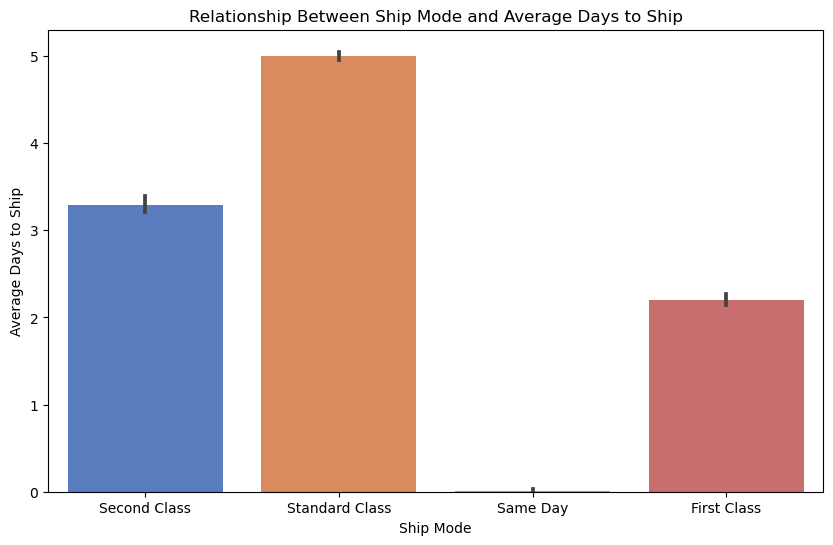

In [18]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Days_to_Ship', data=data, palette='muted')

# Add labels and title
plt.title('Relationship Between Ship Mode and Average Days to Ship')
plt.xlabel('Ship Mode')
plt.ylabel('Average Days to Ship')

# Show the plot
plt.show()

# Barplot explanation: From the bar plot, the Standard mode took an average of five days to ship, Second class an average of three days to ship, First class an average of two days to ship and for same day mode they were shipped the same day. 

# Visualizations: distributions of ship mode, segment, first ten countries by sale and sale distribution


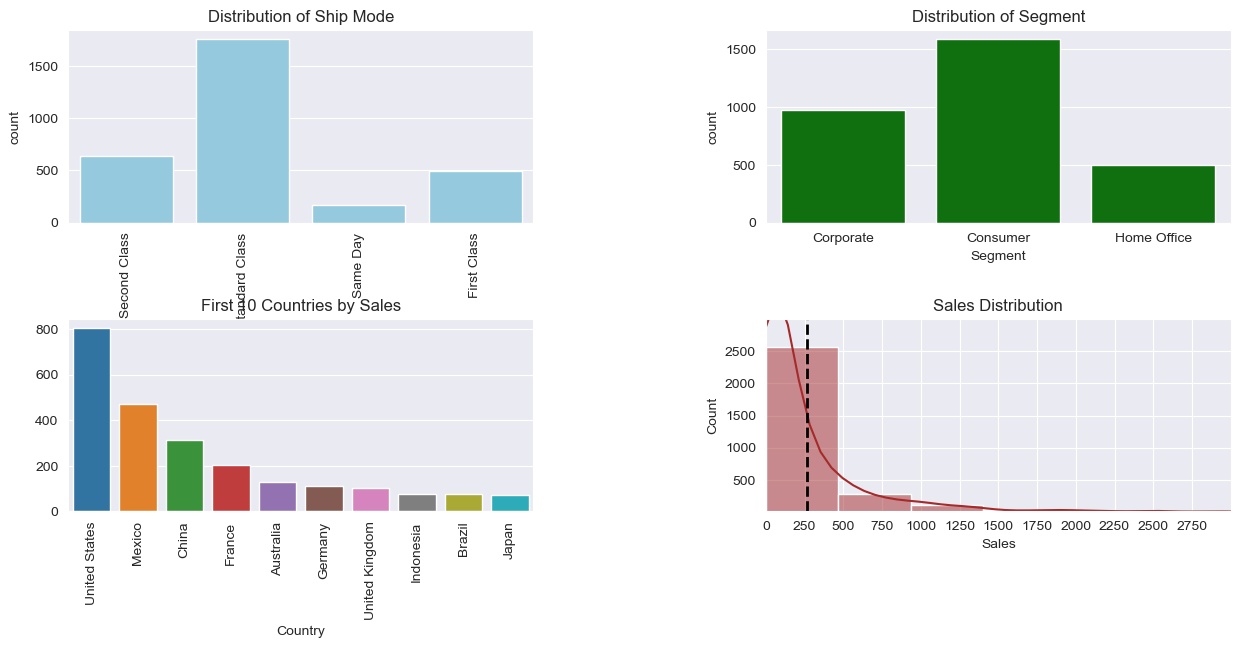

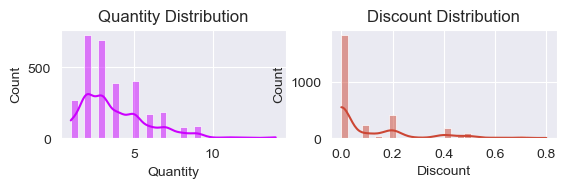

In [19]:

# Visualizations
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
sns.set_style('darkgrid')

# Visualize Ship Mode distribution
plt.subplot(3,2,1)
sns.countplot(data=data, x='Ship Mode', color='Skyblue')
plt.xticks(rotation=90)
plt.title('Distribution of Ship Mode')

# Visualize Segment distribution
plt.subplot(3, 2, 2)
sns.countplot(data=data, x='Segment', color='green')
plt.title('Distribution of Segment')

# Visualize City distribution (consider top cities)
plt.subplot(3, 2, 3)
top_Country = data['Country'].value_counts().head(10)
sns.barplot(x=top_Country.index, y=top_Country.values)
plt.xticks(rotation=90)
plt.title('First 10 Countries by Sales')

#visualize sales and discounts
mean_sales = data['Sales'].mean()

plt.subplot(3, 2, 4)
sns.histplot(data=data, x='Sales', bins=30, color='brown', kde=True)
plt.axvline(mean_sales, color='black', linestyle='dashed', linewidth=2)
xticks=np.arange(0, 3000, 250)
yticks=np.arange(0, 3000, 500)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim(0, 3000)
plt.ylim(10,3000)
plt.title('Sales Distribution')
plt.show()

plt.subplot(3, 2, 5)
sns.histplot(data=data, x='Quantity', bins=30, color='#CC00FF', kde=True)
plt.title('Quantity Distribution')

plt.subplot(3, 2, 6)
sns.histplot(data=data, x='Discount', bins=30,color='#CC4634', kde=True)
plt.title('Discount Distribution')

plt.show()

# visualize profitability by segment

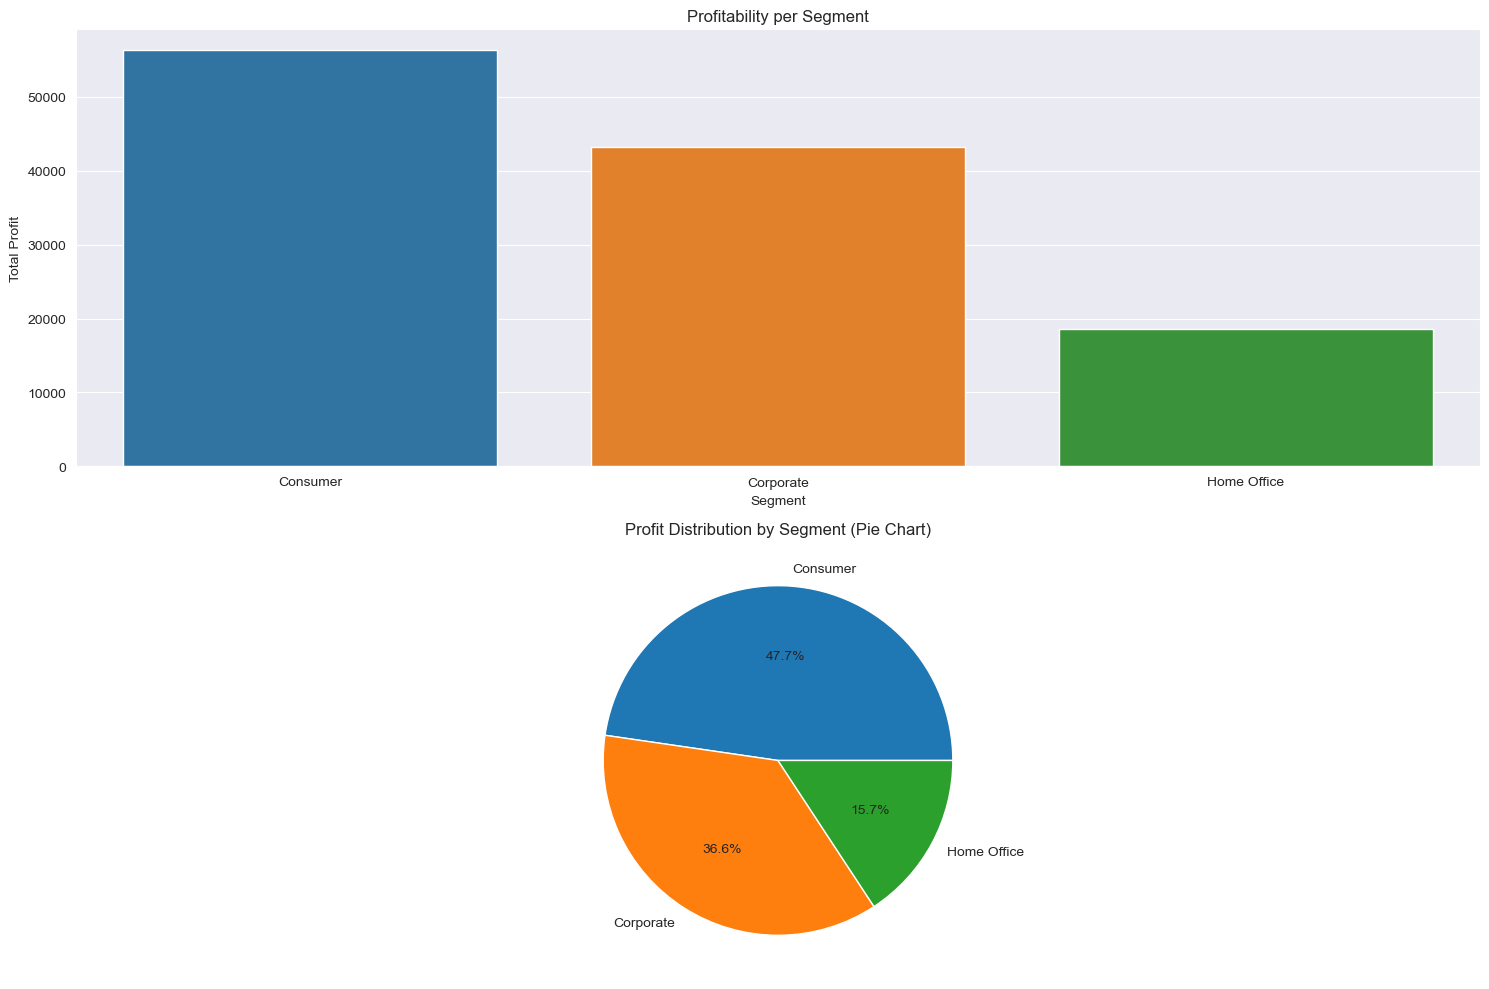

In [20]:

plt.figure(figsize=(15, 10))

# Aggregate the data to get the total profit per segment
profit_per_segment = data.groupby('Segment')['Profit'].sum().reset_index()

# Bar plot
plt.subplot(2, 1, 1)
sns.barplot(x='Segment', y='Profit', data=profit_per_segment)
plt.title('Profitability per Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')

# Pie chart
plt.subplot(2, 1, 2)
plt.pie(profit_per_segment['Profit'], labels=profit_per_segment['Segment'], autopct='%1.1f%%')
plt.title('Profit Distribution by Segment (Pie Chart)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



# From the two visaulaizations the consumer segment was the most profitable scoring a percentage of 47.7% followed by Corporate and lastly Home Office at 15.7 %

# Visualization of sales every year on a histogram. I have created a new column for shipping years.

   Ship Year         Sales
0       2011  150758.52022
1       2012  177737.73860
2       2013  192127.58758
3       2014  298274.68018
4       2015     869.85280


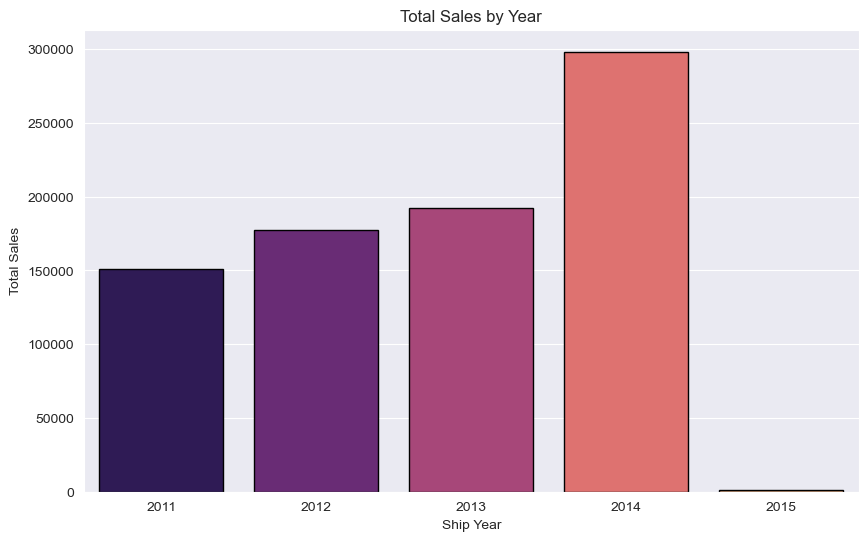

In [22]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Ship Year'] = data['Ship Date'].dt.year

# Group by 'Ship Year' and calculate the total sales for each year
total_sales_by_year = data.groupby('Ship Year')['Sales'].sum().reset_index()

# Display the total sales by year
print(total_sales_by_year)



# Create a bar plot for total sales by year
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x='Ship Year', y='Sales', data=total_sales_by_year, palette='magma', edgecolor='black')

# Add labels and title
plt.title('Total Sales by Year')
plt.xlabel('Ship Year')
plt.ylabel('Total Sales')

# Show the plot
plt.show()



# From the bar plots there was a progressive growth in sales recorded  over the years which is a healthy trend for the business. In 2015 only one month's data had been captured before the data was generated.

# In  the below visualization its a heatmap plot showing the trends in the customers monthly orders

Unique Months Shipped Across All Years: ['February' 'September' 'July' 'October' 'March' 'June' 'November' 'April'
 'May' 'December' 'August' 'January']


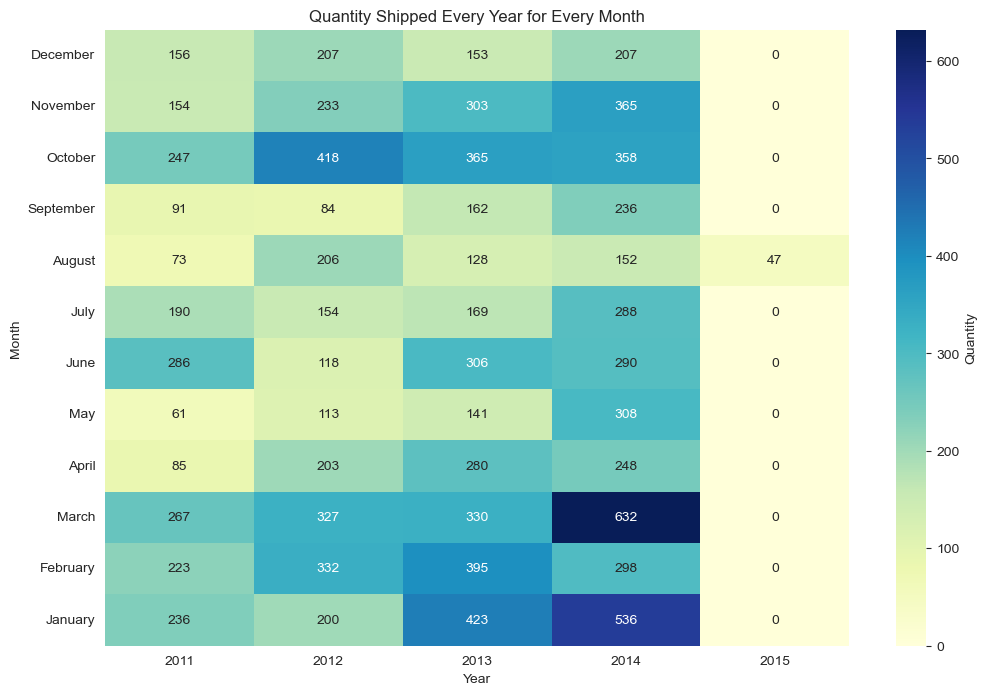

In [25]:
# Extract the months from the 'Ship Date' column and get month names
data['Ship Month'] = data['Ship Date'].dt.strftime('%B')

# Display unique month names for all years
unique_ship_month_names = data['Ship Month'].unique()
print("Unique Months Shipped Across All Years:", unique_ship_month_names)

# Assuming 'data' is your DataFrame
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Month'] = data['Ship Date'].dt.strftime('%B')

# Set the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a pivot table for Quantity by Year and Month
pivot_table = data.pivot_table(values='Quantity', index='Ship Month', columns='Ship Year', aggfunc='sum', fill_value=0)

# Create a heatmap with the specified month order
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Quantity'}, xticklabels=pivot_table.columns, yticklabels=month_order[::-1])
plt.title('Quantity Shipped Every Year for Every Month')
plt.xlabel('Year')
plt.ylabel('Month')

# Show the plot
plt.show()


# "From the heatmap, it is evident that orders have been growing over the years. However, the months of October, November, December, January, February, and March have experienced significantly more orders compared to other months."

# Monthly customers trends on a line plot

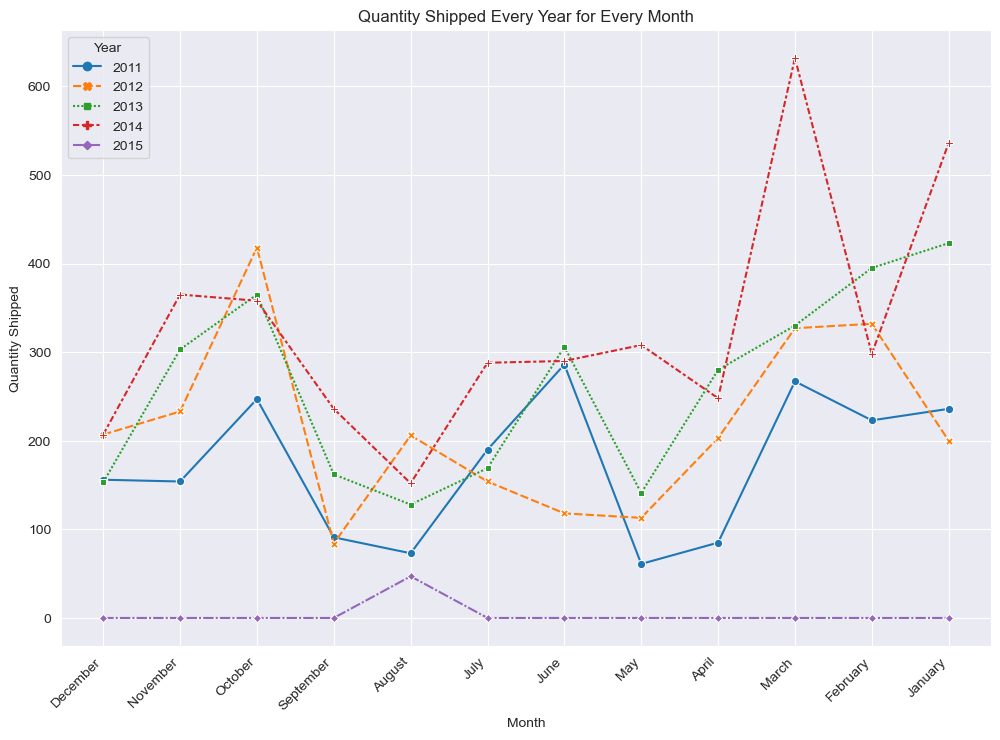

In [28]:
plt.figure(figsize=(12, 8))
line_plot = sns.lineplot(data=pivot_table, markers=True)

# Customize x-axis tick labels
plt.xticks(ticks=range(len(month_order)), labels=month_order[::-1], rotation=45, ha='right')

# Add labels and title
plt.title('Quantity Shipped Every Year for Every Month')
plt.xlabel('Month')
plt.ylabel('Quantity Shipped')

# Show the plot
plt.legend(title='Year', loc='upper left')
plt.show()


# Correlation of the various attributes to sales

In [29]:
corr_df=data[['Sales','Quantity','Shipping Cost','Discount','Profit']].corr()
corr_df

,Sales,Quantity,Shipping Cost,Discount,Profit
Sales,1.000000,0.276322,0.722997,-0.050820,0.659089
Quantity,0.276322,1.000000,0.259259,-0.010454,0.119162
Shipping Cost,0.722997,0.259259,1.000000,-0.042887,0.321809
Discount,-0.050820,-0.010454,-0.042887,1.000000,-0.256650
Profit,0.659089,0.119162,0.321809,-0.256650,1.000000


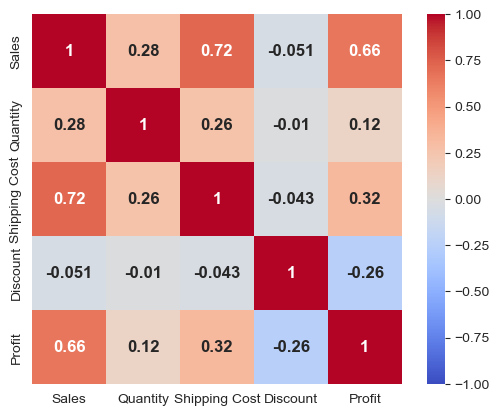

In [30]:
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1,vmax=1,annot=True,square=True,annot_kws={'fontsize':12,'fontweight':'bold'});
# heatmap plot displaying the correlations
# Profit has the strongest positive correlation with sales while Discunt has a negative correlation with the sales

# From the heat map the sales have a strong positive correlation to shipping cost and profits, therefore the higher the sales the higher the profits and the shipping cost. But no strong negative correlation was recorded.